# Ex 4

**Aim**: Perform upsampling and use different interpolation and perform downsampling and do visualize
the summary on grouped data.

In [14]:
# Load packages
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the theme and settings for future plots
sns.set_style("darkgrid")
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["figure.dpi"] = 80

# sklearn for machine learning operations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [3]:
# Load the dataset
df = pd.read_csv('nvda.csv')

# Display the first 5 rows of the dataset
print(df.head())

# Display the shape of the dataset
print('Shape of the dataset:', df.shape)

# Display the data types of the columns
print(df.dtypes)

# Check for missing values in the dataset
print(df.isnull().sum())

# Display summary statistics of the dataset
print(df.describe())

         Date Close/Last    Volume     Open       High      Low
0  02/02/2024    $661.60  47657770  $639.74    $666.00  $636.90
1  02/01/2024    $630.27  36914580  $621.00    $631.91  $616.50
2  01/31/2024    $615.27  45379490  $614.40  $622.6902  $607.00
3  01/30/2024    $627.74  41073530  $629.00    $634.93  $622.60
4  01/29/2024    $624.65  34873300  $612.32    $624.89  $609.07
Shape of the dataset: (2516, 6)
Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64
             Volume
count  2.516000e+03
mean   4.592788e+07
std    2.549195e+07
min    4.564512e+06
25%    2.962584e+07
50%    4.048936e+07
75%    5.532294e+07
max    3.688132e+08


In [4]:
# Column to use as the date
date_col = "Date"
# Replace with the file you want to use and load your dataset into a DataFrame
df = pd.read_csv("nvda.csv", index_col=date_col, parse_dates=True)
# Check that the index is correctly converted to a date
print("The index been parsed as a date: " + str(is_datetime(df.index)))

The index been parsed as a date: True


In [9]:
# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Convert column names to lower case
df.columns = df.columns.str.lower()

# Check if 'date' column exists
if 'date' in df.columns:
    # Convert 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])

    # Set 'date' as the index
    df.set_index('date', inplace=True)

    # Reduce the DataFrame down to the relevant columns
    df_subset = df.copy()

    # Select the date range you want to explore
    df_time = df_subset["2020-1-1":"2021-1-1"].copy()

    # Preview the DataFrame
    print(df_time)
else:
    print("The 'date' column does not exist in the DataFrame.")

The 'date' column does not exist in the DataFrame.


## Upsampling

In [10]:
# Upsample to get data for each day
df_daily = df.resample('D').asfreq()

# Fill missing values with NaN
df_daily_nan = df_daily

# Fill missing values by interpolation
df_daily_interpolated = df_daily.interpolate()

print(df_daily_nan)
print(df_daily_interpolated)

           close/last      volume     open       high      low
Date                                                          
2014-02-05      $3.86  21467728.0  $3.8675      $3.88    $3.83
2014-02-06      $3.91  16838164.0   $3.865      $3.92    $3.86
2014-02-07    $3.9675  15736624.0    $3.92    $3.9725   $3.885
2014-02-08        NaN         NaN      NaN        NaN      NaN
2014-02-09        NaN         NaN      NaN        NaN      NaN
...               ...         ...      ...        ...      ...
2024-01-29    $624.65  34873300.0  $612.32    $624.89  $609.07
2024-01-30    $627.74  41073530.0  $629.00    $634.93  $622.60
2024-01-31    $615.27  45379490.0  $614.40  $622.6902  $607.00
2024-02-01    $630.27  36914580.0  $621.00    $631.91  $616.50
2024-02-02    $661.60  47657770.0  $639.74    $666.00  $636.90

[3650 rows x 5 columns]
           close/last        volume     open       high      low
Date                                                            
2014-02-05      $3.86  2.1

/tmp/ipykernel_17657/3228031906.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_daily_interpolated = df_daily.interpolate()


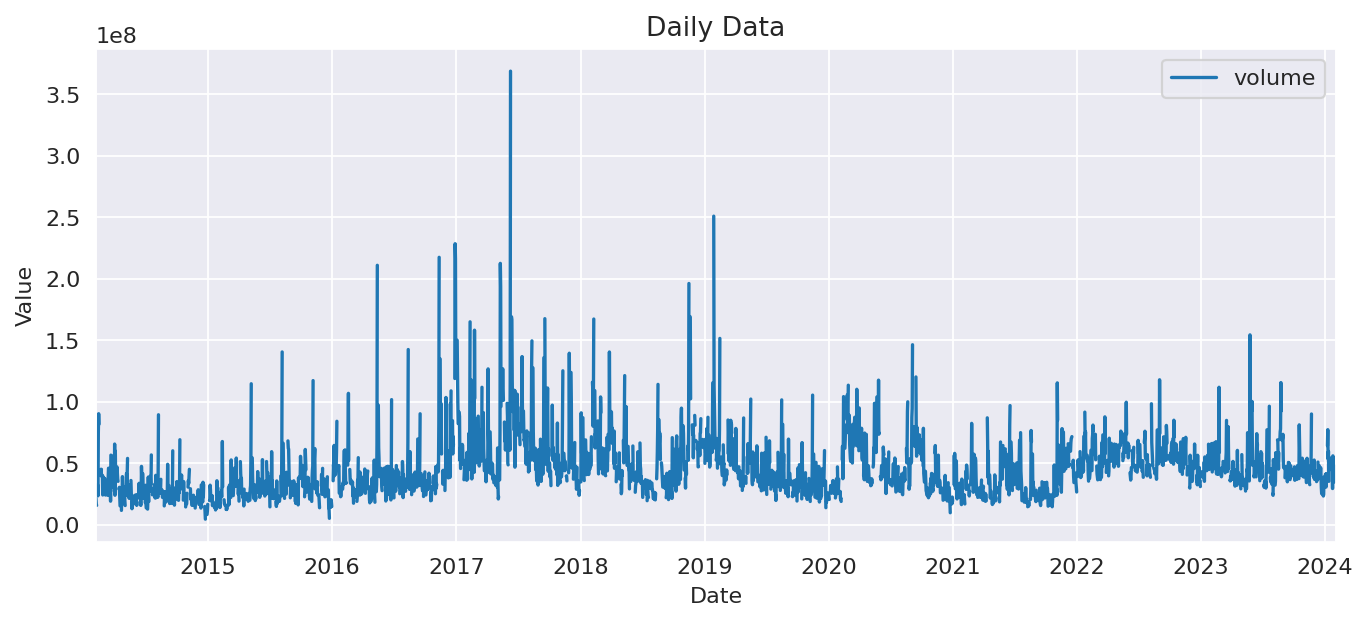

In [23]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the data
df_daily.plot(ax=ax)

# Set the title and labels
ax.set_title('Daily Data')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Show the plot
plt.show()

## Downsampling

In [15]:
# Load the dataset
df = pd.read_csv('nvda.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Downsample to get the mean stock price for each month for numeric columns only
df_monthly = df.select_dtypes(include=[np.number]).resample('M').mean()

print(df_monthly)

                  Volume
Date                    
2014-02-28  4.123292e+07
2014-03-31  3.435461e+07
2014-04-30  3.302162e+07
2014-05-31  2.672271e+07
2014-06-30  2.509653e+07
...                  ...
2023-10-31  4.610188e+07
2023-11-30  4.357024e+07
2023-12-31  3.705943e+07
2024-01-31  4.622018e+07
2024-02-29  4.228618e+07

[121 rows x 1 columns]


/tmp/ipykernel_17657/1622816584.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.select_dtypes(include=[np.number]).resample('M').mean()


## Resampling

In [17]:
# Load the data
df = pd.read_csv('nvda.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Downsample to monthly data, apply mean to numeric columns only
df_monthly = df.select_dtypes(include=[np.number]).resample('M').mean()

# Upsample to hourly data
df_hourly = df.resample('H').ffill()

/tmp/ipykernel_17657/1364530412.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.select_dtypes(include=[np.number]).resample('M').mean()
/tmp/ipykernel_17657/1364530412.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').ffill()


## Downsampling

In [19]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('nvda.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Downsample to monthly data, apply mean to numeric columns only
df_monthly = df.select_dtypes(include=[np.number]).resample('M').mean()

/tmp/ipykernel_17657/1276667167.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.select_dtypes(include=[np.number]).resample('M').mean()


In [20]:
df_monthly

,Volume
Date,
2014-02-28,4.123292e+07
2014-03-31,3.435461e+07
2014-04-30,3.302162e+07
2014-05-31,2.672271e+07
2014-06-30,2.509653e+07
...,...
2023-10-31,4.610188e+07
2023-11-30,4.357024e+07
2023-12-31,3.705943e+07


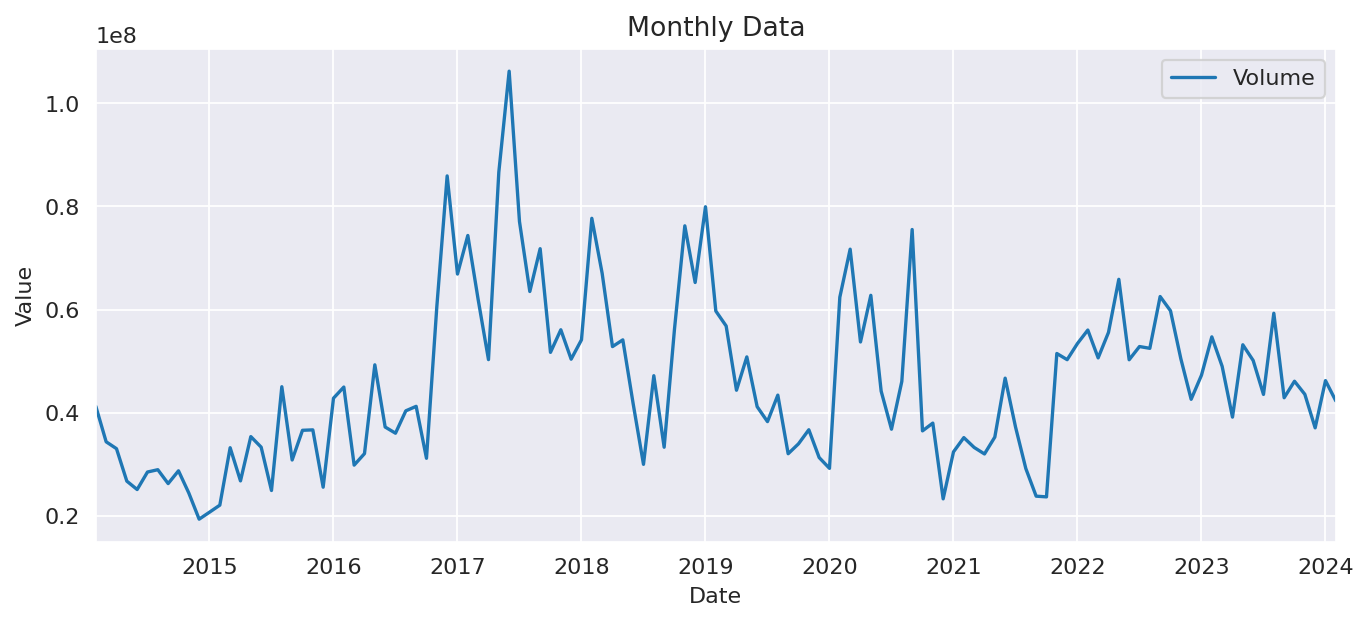

In [22]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the data
df_monthly.plot(ax=ax)

# Set the title and labels
ax.set_title('Monthly Data')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Show the plot
plt.show()